# **1. Data Preparation**

###**1.1 Data Cleaning**

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
import re

In [2]:
# Load datasets
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [3]:
# Add a 'label' column to each dataset
fake_news['label'] = 0  # 0 for fake news
true_news['label'] = 1  # 1 for true news

In [4]:
# Combine datasets
news_data = pd.concat([fake_news, true_news], ignore_index=True)

# Shuffle the data
news_data = news_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Display combined data info
print("\nCombined DataFrame Info:")
print(news_data.info())


Combined DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44265 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   Unnamed: 4  1 non-null      object
 6   Unnamed: 5  1 non-null      object
 7   Unnamed: 6  1 non-null      object
 8   Unnamed: 7  1 non-null      object
dtypes: int64(1), object(8)
memory usage: 3.1+ MB
None


In [5]:
news_data = news_data.drop(['Unnamed: 4', 'Unnamed: 5','Unnamed: 6','Unnamed: 7'], axis=1)

###**1.2 Remove Missing Data**

In [6]:
# Check for missing values
missing_values = news_data.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)

# Drop rows with missing values
news_data = news_data.dropna().reset_index(drop=True)


Missing Values in Each Column:
title        0
text       633
subject      0
date         0
label        0
dtype: int64


In [7]:
news_data

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1
3,OOPS: Trump Just Accidentally Confirmed He Lea...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1
...,...,...,...,...,...
44260,Hillarys Message To Former Miss Universe Call...,Miss Universe 1996 Alicia Machado is now an Am...,News,"May 20, 2016",0
44261,PM May seeks to ease Japan's Brexit fears duri...,LONDON/TOKYO (Reuters) - British Prime Ministe...,worldnews,"August 29, 2017",1
44262,Merkel: Difficult German coalition talks can r...,BERLIN (Reuters) - Chancellor Angela Merkel sa...,worldnews,"November 16, 2017",1
44263,Trump Stole An Idea From North Korean Propagan...,Jesus f*cking Christ our President* is a moron...,News,"July 14, 2017",0


###**1.3 Handle Duplicates**

In [8]:
# Check for duplicates values
duplicate_rows = news_data[news_data.duplicated(subset=['text'])]
print("\nDuplicate Rows:")
print(duplicate_rows)

# Drop rows with duplicates values
news_data.drop_duplicates(subset=['text'], inplace=True)
print("\nAfter Removing Duplicates:")
print(news_data.info())


Duplicate Rows:
                                                   title  \
1027   CHILLING PHOTO Captures FEMALE SUICIDE BOMBER ...   
1141   TEEN VOGUE Publishes Article To Teach Teen Gir...   
1322   THOUGHT POLICE: US Border Control Wants to Stu...   
1345   WATCH: BLACK SPORTS HOST BLASTS White ESPN Spo...   
1350   LOL! This One Picture Sums Up Trumps BRUTAL S...   
...                                                  ...   
44247  WATCH: MEGHAN MCCAIN RIPS Into Joy Behar For H...   
44255  CLEAR DISCRIMINATION: SNAP Still Gives Prefere...   
44257  Iraqi PM Rebuffs U.S. Decree That Foreign Shi...   
44259  Taxpayer Funded Left-Wing Church Organization ...   
44264  BREAKING: HILLARY CLINTONS STATE DEPARTMENT G...   

                                                    text          subject  \
1027   Why would President Trump want America to enfo...         politics   
1141   Two months before the 2016 election, Teen Vogu...         politics   
1322   Patrick Henningsen 21st 

###**1.4 Remove Non-Textual Content**

In [9]:
def clean_text(text):
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    return text.strip()

news_data['text'] = news_data['text'].apply(clean_text)

###**1.5 Lowercase Conversion**

In [10]:
# Convert the 'text' columns to lowercase
news_data['text'] = news_data['text'].str.lower()
print(news_data['text'])

0        21st century wire says ben stein reputable pro...
1        washington reuters u s president donald trump ...
2        reuters puerto rico governor ricardo rossello ...
3        on monday donald trump once again embarrassed ...
4        glasgow scotland reuters most u s presidential...
                               ...                        
44258    nairobi reuters burundi s main opposition grou...
44260    miss universe 1996 alicia machado is now an am...
44261    london tokyo reuters british prime minister th...
44262    berlin reuters chancellor angela merkel said g...
44263    jesus f cking christ our president is a moron ...
Name: text, Length: 38642, dtype: object


# **2. Exploratory Data Analysis (EDA)**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

###**2.1 Analyze Class Distribution**

C:\Users\dell\AppData\Local\Temp\ipykernel_27408\849071216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='label', data=news_data, kind='count', palette="pastel")


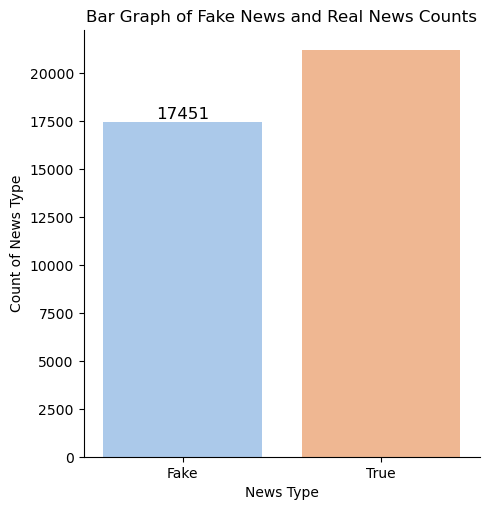

In [12]:
# Bar Graph of fake news and real news counts
g = sns.catplot(x='label', data=news_data, kind='count', palette="pastel")

# Set the x-tick labels to more readable class names
g.set_xticklabels(["Fake", "True"])

# Add titles and axis labels
plt.title('Bar Graph of Fake News and Real News Counts')
plt.xlabel('News Type')
plt.ylabel('Count of News Type')

# Add labels on top of the bars
for ax in g.axes.flat:
    ax.bar_label(ax.containers[0], fontsize=12)

# Show the plot
plt.show()

###**2.2 Text Length Analysis**

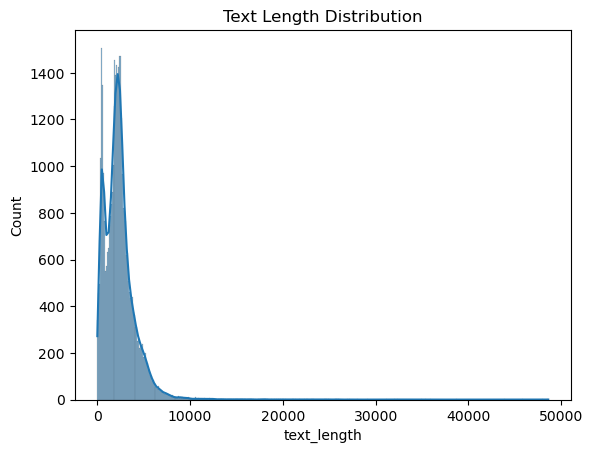

In [13]:
news_data['text_length'] = news_data['text'].apply(len)
sns.histplot(news_data['text_length'], kde=True)
plt.title('Text Length Distribution')
plt.show()

###**2.3 Word Frequency Analysis**

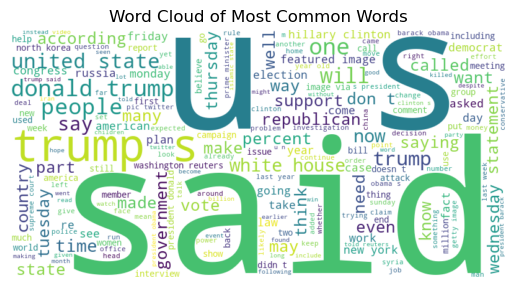

In [14]:
all_words = ' '.join(news_data['text'])
word_freq = Counter(all_words.split()).most_common(20)

# Visualize Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Common Words')
plt.show()

####**2.4 Pie Chart of fake news and real news percentage**

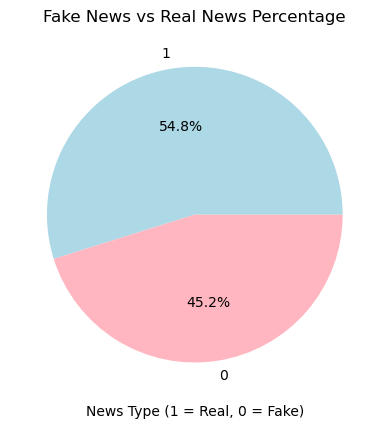

In [15]:
plt.pie(news_data["label"].value_counts().values, 
        explode=[0, 0],  # No explosion for the slices
        labels=news_data["label"].value_counts().index, 
        autopct='%1.1f%%',  # Show percentage with one decimal place
        colors=['LightBlue', 'LightPink'])  # Custom colors for the slices

# Set the title and label
plt.title('Fake News vs Real News Percentage')
plt.xlabel('News Type (1 = Real, 0 = Fake)')

# Show the plot
plt.show()

####**2.5 Distribution of The Subject by Real and Fake Data**

<Axes: xlabel='subject', ylabel='count'>

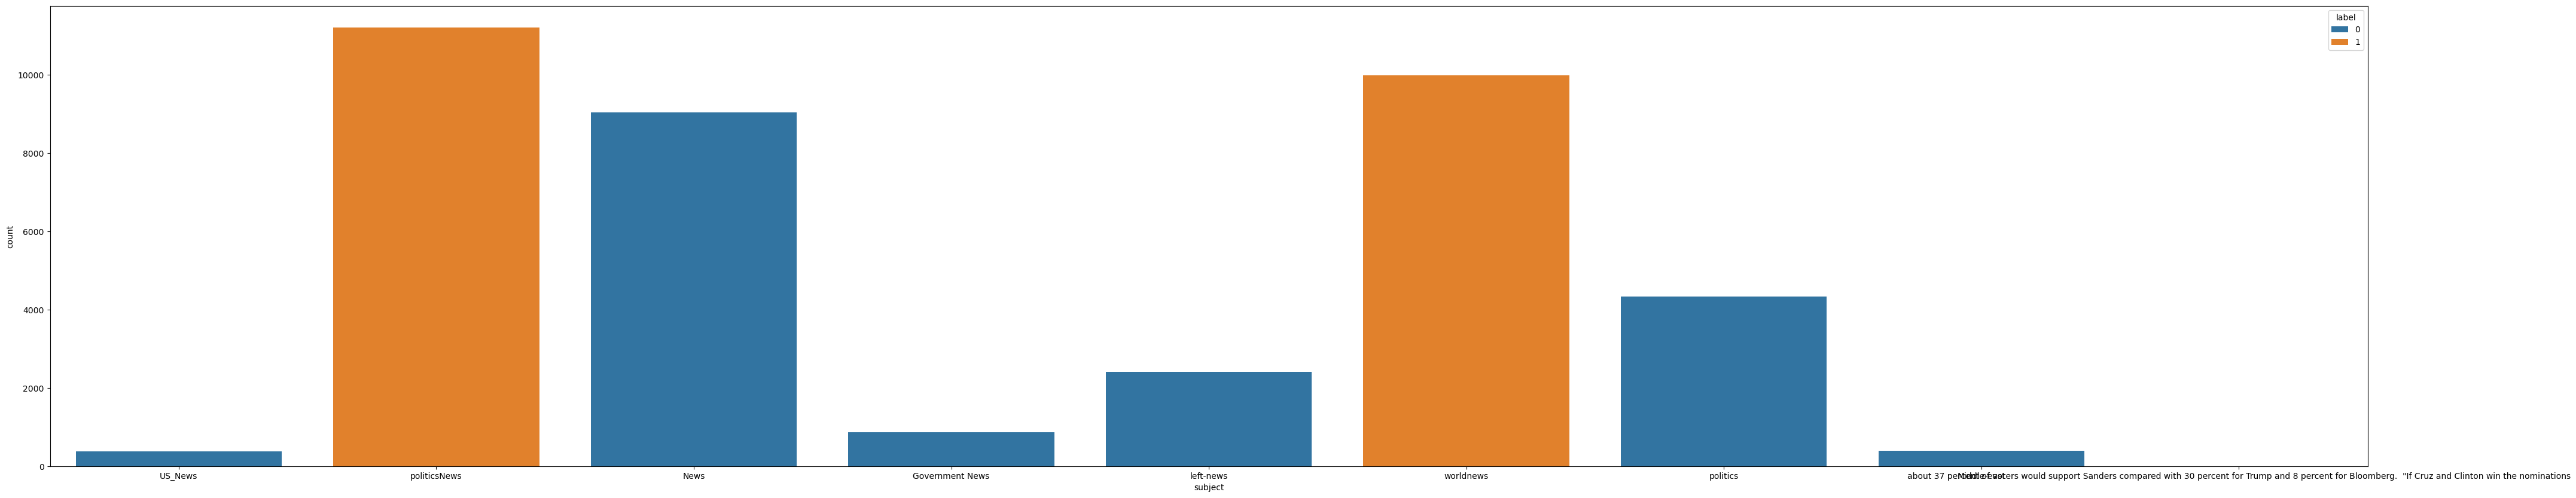

In [16]:
plt.figure(figsize=(50,10))
sns.countplot(x= "subject", hue = "label", data=news_data)

# **3. Text Preprocessing**

     Prepare text for vectorization and machine learning.

###**3.1 Tokenization**

Split text into individual words or tokens.

In [17]:
from nltk.tokenize import word_tokenize
news_data['tokens'] = news_data['text'].apply(word_tokenize)

###**3.2 Stopwords Removal**

Remove common words (e.g., "and", "is", "the") using predefined stopword lists.


In [18]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
news_data['tokens'] = news_data['tokens'].apply(lambda x: [word for word in x if word not in stop_words])

###**3.3 Lemmatization**

Reduce words to their base forms to normalize text (e.g., "running" → "run").


In [19]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
news_data['tokens'] = news_data['tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

###**3.4 Rejoin Tokens into Processed Text**

Combine tokens back into processed text for model input.

In [20]:
news_data['processed_text'] = news_data['tokens'].apply(lambda x: ' '.join(x))

In [21]:
#Inspect processed text
print(news_data['processed_text'].head())

0    21st century wire say ben stein reputable prof...
1    washington reuters u president donald trump re...
2    reuters puerto rico governor ricardo rossello ...
3    monday donald trump embarrassed country accide...
4    glasgow scotland reuters u presidential candid...
Name: processed_text, dtype: object


# **4. Feature Extraction**
        
    Feature extraction is about converting the preprocessed text into numerical representations that a machine learning model can process.

###**4.1 Vectorization**

**TF-IDF Vectorizer:**

Assigns weights to words based on their frequency and importance.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Assuming `news_data` contains the processed text and labels
# `processed_text` is the column with preprocessed news articles
# `label` is the target column (0 for fake, 1 for real)

# Splitting the dataset into training and testing sets
X = news_data['processed_text']
y = news_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))

# Apply TF-IDF transformation
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train a Multinomial Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9507051364989002
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3436
           1       0.95      0.96      0.96      4293

    accuracy                           0.95      7729
   macro avg       0.95      0.95      0.95      7729
weighted avg       0.95      0.95      0.95      7729



# **5. Model Building**

###**5.1 Classification Models**

In [23]:
# Importing Libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**a) Logistic Regression :**

- Train and evaluate the Logistic Regression model.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train Logistic Regression classifier
# Adjust max_iter for convergence (especially with large datasets)
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)  # X_train_vec is the vectorized training data

# Predict on the test set
y_pred_lr = lr_model.predict(X_test_tfidf)  # X_test_vec is the vectorized test data

# Calculate metrics
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_f1 = f1_score(y_test, y_pred_lr, average='weighted')

# Evaluate
print("\nLogistic Regression Results:")
print(f"Accuracy: {lr_accuracy:.2f}")
print(f"F1-Score: {lr_f1:.2f}")
print(classification_report(y_test, y_pred_lr))



Logistic Regression Results:
Accuracy: 0.99
F1-Score: 0.99
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3436
           1       0.98      0.99      0.99      4293

    accuracy                           0.99      7729
   macro avg       0.99      0.99      0.99      7729
weighted avg       0.99      0.99      0.99      7729



**b) Naive Bayes:**

- Train and evaluate the Naive Bayes model.

In [25]:
from sklearn.naive_bayes import MultinomialNB

# Train Naive Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_nb = nb_model.predict(X_test_tfidf)

# Calculate Metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

# Evaluate
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb)}")
print(classification_report(y_test, y_pred_nb))


Naive Bayes Results:
Accuracy: 0.9507051364989002
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3436
           1       0.95      0.96      0.96      4293

    accuracy                           0.95      7729
   macro avg       0.95      0.95      0.95      7729
weighted avg       0.95      0.95      0.95      7729



**c) Support Vector Machine (SVM):**

- Train and evaluate the SVM model.


In [26]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Train SVM classifier with linear kernel
svm_model = LinearSVC(C=1.0, max_iter=1000)  # You can adjust C and max_iter as needed
svm_model.fit(X_train_tfidf, y_train)

# Predict on test set
y_pred_svm = svm_model.predict(X_test_tfidf)

# Calculate Metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm, average='weighted')

# Evaluate
print("\nSVM Results:")
print(f"Accuracy: {svm_accuracy:.2f}")
print(f"F1-Score: {svm_f1:.2f}")
print(classification_report(y_test, y_pred_svm))




SVM Results:
Accuracy: 0.99
F1-Score: 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3436
           1       0.99      0.99      0.99      4293

    accuracy                           0.99      7729
   macro avg       0.99      0.99      0.99      7729
weighted avg       0.99      0.99      0.99      7729



**d) XGBoost:**

- Train and evaluate the XGBoost model.

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# Initialize XGBoost
xgb_model = XGBClassifier(
    n_estimators=100, 
    max_depth=6, 
    learning_rate=0.1, 
    use_label_encoder=False,  # Avoid deprecation warnings
    eval_metric='logloss'     # Specify evaluation metric
)

# Train the model
xgb_model.fit(X_train_tfidf, y_train)  # Ensure X_train_tfidf is vectorized data

# Predictions
y_pred_xgb = xgb_model.predict(X_test_tfidf)  # Use the same vectorizer for test data

# Calculate Metrics
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_f1 = f1_score(y_test, y_pred_xgb, average='weighted')

# Evaluation
print("\nXGBoost Performance:")
print(f"Accuracy: {xgb_accuracy:.2f}")
print(f"F1-Score: {xgb_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



C:\Users\dell\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:23:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Performance:
Accuracy: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3436
           1       1.00      1.00      1.00      4293

    accuracy                           1.00      7729
   macro avg       1.00      1.00      1.00      7729
weighted avg       1.00      1.00      1.00      7729


Confusion Matrix:
[[3416   20]
 [  10 4283]]


**e) Decision Tree:**

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)  # Random state ensures reproducibility
dt_model.fit(X_train_tfidf, y_train)  # Fit the model on the TF-IDF vectorized training data

# Predict on the test set
y_pred_dt = dt_model.predict(X_test_tfidf)

# Calculate Metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

# Evaluate the model
print("\nDecision Tree Results:")
print(f"Accuracy: {dt_accuracy:.2f}")
print(f"F1-Score: {dt_f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))



Decision Tree Results:
Accuracy: 0.99
F1-Score: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3436
           1       1.00      0.99      0.99      4293

    accuracy                           0.99      7729
   macro avg       0.99      0.99      0.99      7729
weighted avg       0.99      0.99      0.99      7729



**f) Random Forest:**

In [29]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Train Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)  # Fit model on training data

# Predict on test set
y_pred_rf = rf_model.predict(X_test_tfidf )

# Calculate Metrics
rf_accuracy = accuracy_score(y_test, y_pred_rf)  # Accuracy of the model
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')  # F1-score for the model

# Evaluate
print("\nRandom Forest Results:")
print(f"Accuracy: {rf_accuracy}")
print(f"F1-Score: {rf_f1}")
print(classification_report(y_test, y_pred_rf))



Random Forest Results:
Accuracy: 0.9956009833096131
F1-Score: 0.9955999414250848
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3436
           1       0.99      1.00      1.00      4293

    accuracy                           1.00      7729
   macro avg       1.00      1.00      1.00      7729
weighted avg       1.00      1.00      1.00      7729



**g) LightGBM (LGBM):**

In [30]:
# Import necessary libraries
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Convert features to float32 to avoid type errors
X_train_vec = X_train_tfidf.astype('float32')
X_test_vec = X_test_tfidf.astype('float32')

# Train LightGBM classifier
lgb_model = lgb.LGBMClassifier(random_state=42, n_estimators=100)
lgb_model.fit(X_train_vec, y_train)  # Fit model on training data

# Predict on test set
y_pred_lgb = lgb_model.predict(X_test_vec)

# Calculate Metrics
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)  # Accuracy of the model
lgb_f1 = f1_score(y_test, y_pred_lgb, average='weighted')  # F1-score for the model

# Evaluate
print("\nLightGBM Results:")
print(f"Accuracy: {lgb_accuracy}")
print(f"F1-Score: {lgb_f1}")
print(classification_report(y_test, y_pred_lgb))


C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16898, number of negative: 14015
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.866994 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 771029
[LightGBM] [Info] Number of data points in the train set: 30913, number of used features: 5000
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.546631 -> initscore=0.187067
[LightGBM] [Info] Start training from score 0.187067

LightGBM Results:
Accuracy: 0.9962478975287877
F1-Score: 0.996247401764531
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3436
           1       1.00      1.00      1.00      4293

    accuracy                           1.00      7729
   macro avg       1.00      1.00      1.00      7729
weighted avg       1.00      1.00      1.00      7729



C:\Users\dell\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


###**5.2 Evaluate Model Performance**

**a) Logistic Regression:**

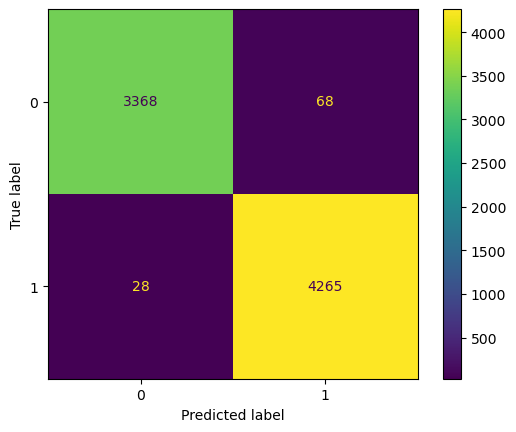

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()

**b) Naive Bayes:**

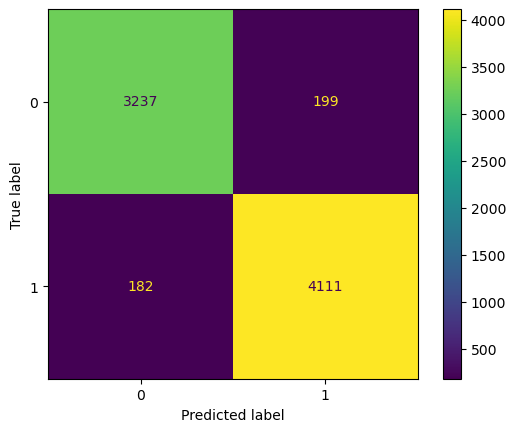

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)
plt.show()

**c) Support Vector Machine (SVM):**

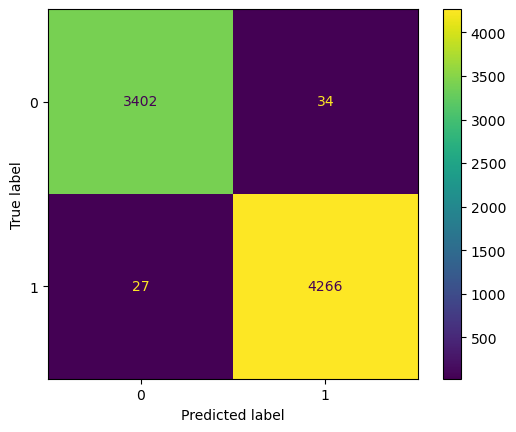

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm)
plt.show()

**d) XGBoost:**

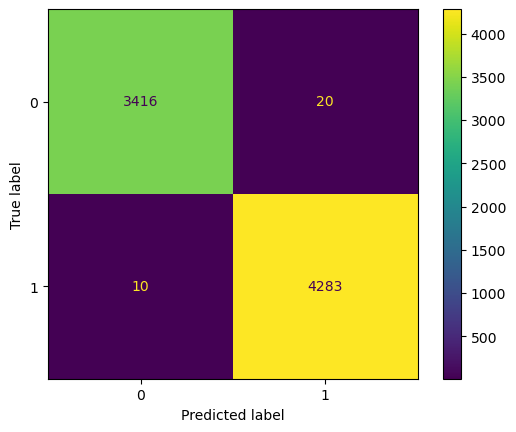

In [34]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb)
plt.show()

**e) Decision Tree:**

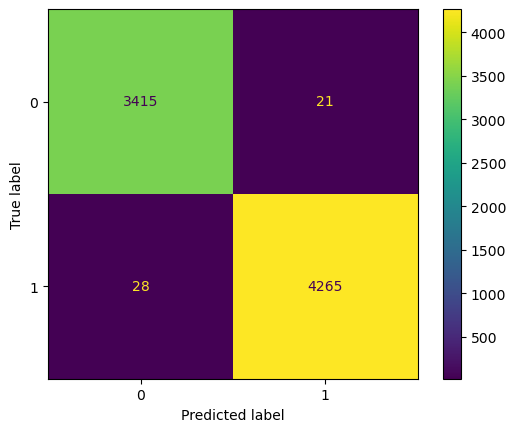

In [35]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)
plt.show()

**f) Random Forest:**

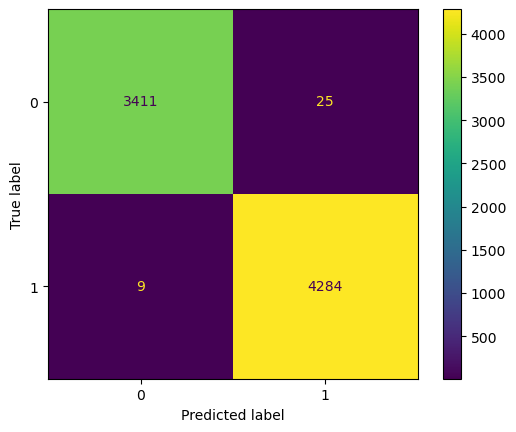

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()

**g) LightGBM (LGBM):**

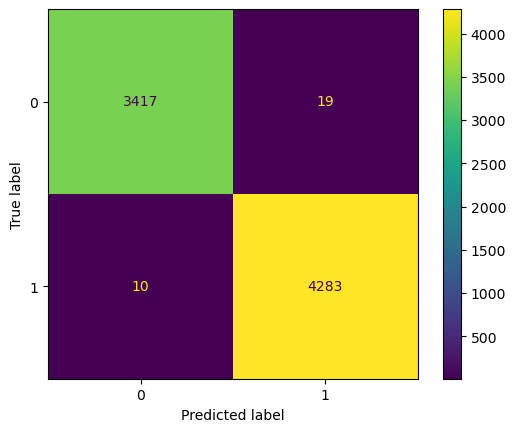

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lgb)
plt.show()

###**5.3 Summary of Results**

In [38]:
# Summary of results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'SVM', 'XGBoost', 'Decision Tree', 'Random Forest', 'LightGBM'],
    'Accuracy': [lr_accuracy, nb_accuracy, svm_accuracy, xgb_accuracy, dt_accuracy, rf_accuracy, lgb_accuracy],
    'F1-Score': [lr_f1, nb_f1, svm_f1, xgb_f1, dt_f1, rf_f1, lgb_f1]
})

print("\nModel Performance Comparison:")
print(results)



Model Performance Comparison:
                 Model  Accuracy  F1-Score
0  Logistic Regression  0.987579  0.987572
1          Naive Bayes  0.950705  0.950693
2                  SVM  0.992108  0.992107
3              XGBoost  0.996119  0.996118
4        Decision Tree  0.993660  0.993661
5        Random Forest  0.995601  0.995600
6             LightGBM  0.996248  0.996247


In [39]:
pip install streamlit


In [41]:
# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [43]:
import gzip
import pickle

# Save compressed pickle file
with gzip.open('fake_news_model.pkl.gz', 'wb') as compressed_file:
    pickle.dump(model, compressed_file)

# Load compressed pickle file
with gzip.open('fake_news_model.pkl.gz', 'rb') as compressed_file:
    model = pickle.load(compressed_file)




import pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)